## Data Preprocessing

### Importing necessary libraries

In [176]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

### Importing the data 

In [177]:
train=pd.read_csv('/content/Google_Stock_Price_Train.csv')
train.head(-2)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1251,12/21/2016,795.84,796.68,787.10,794.56,"1,211,300"
1252,12/22/2016,792.36,793.32,788.58,791.26,"972,200"
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"


In [178]:
test=pd.read_csv('/content/Google_Stock_Price_Test.csv')
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


### Exploring the data 

In [179]:
print('the shape of the train \n',train.shape)
print('the shape of the test \n',test.shape)

the shape of the train 
 (1258, 6)
the shape of the test 
 (20, 6)


the years of the historical data 

In [180]:
Date=pd.DataFrame()
Date['Year'] = pd.DatetimeIndex(train['Date']).year
Date['Year'].value_counts()

2013    252
2014    252
2015    252
2016    252
2012    250
Name: Year, dtype: int64

#### Exploring the features that the model will be trained or will predict for the January 2017 

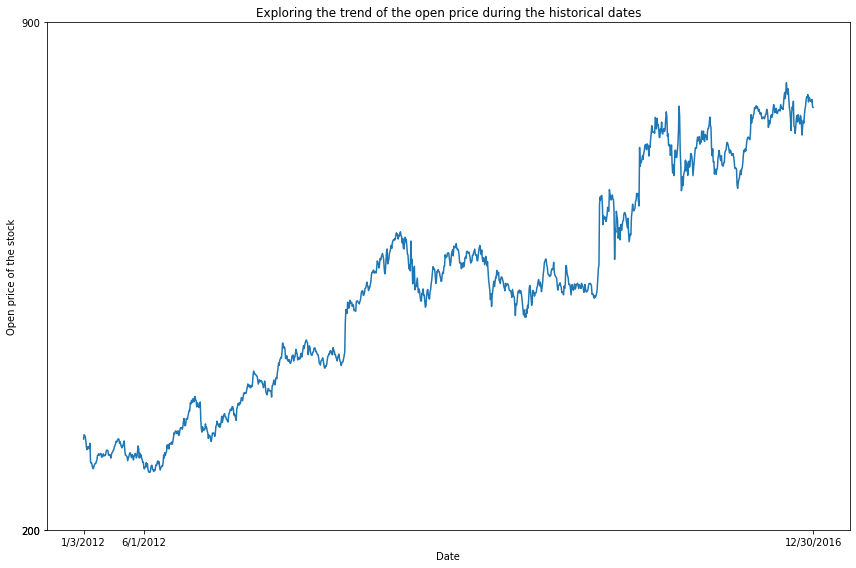

In [181]:
fig=plt.figure(figsize=(12,8))
plt.plot(train['Date'], train['Open'])
axes = plt.axes()
x_values = axes.get_xticks()
y_values = axes.get_yticks()
x_len = len(x_values)
y_len = len(y_values)
new_x = [x_values[i] for i in [0, x_len // 12, -1]]
new_y = [y_values[i] for i in [0, y_len // 12, -1]]
axes.set_xticks(new_x)
axes.set_yticks(new_y)
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Open price of the stock')
plt.title('Exploring the trend of the open price during the historical dates')
plt.show()

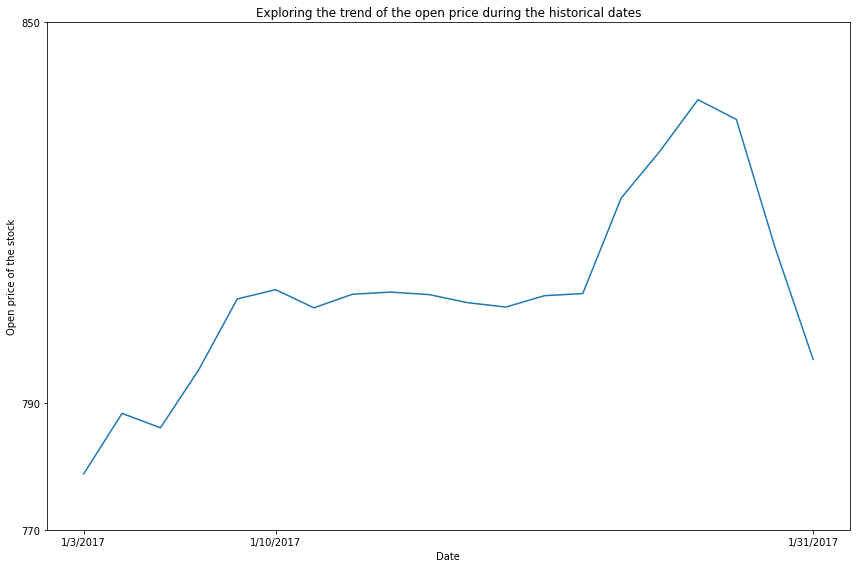

In [182]:
fig=plt.figure(figsize=(12,8))
plt.plot(test['Date'], test['Open'])
axes = plt.axes()
x_values = axes.get_xticks()
y_values = axes.get_yticks()
x_len = len(x_values)
y_len = len(y_values)
new_x = [x_values[i] for i in [0, x_len // 4, -1]]
new_y = [y_values[i] for i in [0, y_len // 4, -1]]
axes.set_xticks(new_x)
axes.set_yticks(new_y)
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Open price of the stock')
plt.title('Exploring the trend of the open price during the historical dates')
plt.show()

#### geting the useful training set and put it in a dimensional array  

In [183]:
train_set=train.iloc[:,1:2].values

### Features Scaling  

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range = (0, 1))
train_set_scaled = scaler.fit_transform(train_set)
train_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a new data structure by shifting the data by 75 timestep

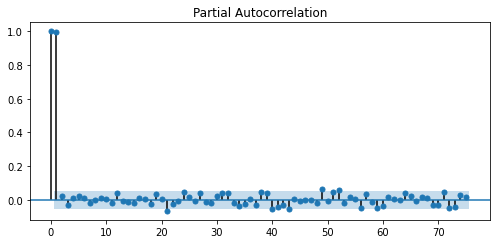

In [185]:
from statsmodels.graphics.tsaplots import plot_pacf
_ = plot_pacf(train['Open'], lags=75)

In [186]:
len(train_set_scaled)

1258

In [187]:
Shift_train=[]
y_train=[]
n=len(train_set_scaled)
TS=50
for i in range (TS,n) : 
  Shift_train.append(train_set_scaled[i-TS:i,0])
  y_train.append(train_set_scaled[i,0])



In [188]:
shift=pd.DataFrame(data=Shift_train)
shift.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,...,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,...,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,0.938760,0.934035,0.934835,0.931394,0.946369,0.965697,0.975110,0.959670,0.978086,1.000000,...,0.917777,0.931766,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232
1203,0.934035,0.934835,0.931394,0.946369,0.965697,0.975110,0.959670,0.978086,1.000000,0.980765,...,0.931766,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759
1204,0.934835,0.931394,0.946369,0.965697,0.975110,0.959670,0.978086,1.000000,0.980765,0.970831,...,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043
1205,0.931394,0.946369,0.965697,0.975110,0.959670,0.978086,1.000000,0.980765,0.970831,0.984504,...,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633


we obtained this new dataset which is similar to what we are used to work on in a supervised problem 

In [189]:
y_train_frame=pd.DataFrame(data=y_train,columns=['open_price'])
y_train_frame.head()

,open_price
0,0.052143
1,0.056124
2,0.058189
3,0.065407
4,0.068830


In [190]:
print('the shape of the new train \n',shift.shape)
print('the shape of the target \n',y_train_frame.shape)

the shape of the new train 
 (1208, 50)
the shape of the target 
 (1208, 1)


### Google stock price is highly corrolated to other companies stock prices according to researchs that's why we try to add it as new feature to the dataset

In [192]:
motorola_data=pd.read_csv('/content/MacroTrends_Data_Download_MSFT.csv')
motorola_data.head()

,date,open,high,low,close,volume
0,1986-03-13,0.0558,0.0641,0.0558,0.0613,1031788800
1,1986-03-14,0.0613,0.0646,0.0613,0.0635,308160000
2,1986-03-17,0.0635,0.0651,0.0635,0.0646,133171200
3,1986-03-18,0.0646,0.0651,0.0624,0.0630,67766400
4,1986-03-19,0.0630,0.0635,0.0613,0.0619,47894400


In [193]:
start_date = '2012-01-02'
end_date = '2016-12-30'
start_test_date='2017-01-02'
end_test_date='2017-01-31'
# Select DataFrame rows between two dates
mask_train = (motorola_data['date'] > start_date) & (motorola_data['date'] <= end_date)
mask_test = (motorola_data['date'] > start_test_date) & (motorola_data['date'] <= end_test_date)
motorola_train_data = motorola_data.loc[mask_train]
motorola_test_data = motorola_data.loc[mask_test]
motorola_test_data.head()

,date,open,high,low,close,volume
7767,2017-01-03,58.1933,58.2397,57.5770,57.9987,20694101
7768,2017-01-04,57.9060,58.1562,57.5724,57.7392,21339969
7769,2017-01-05,57.6372,58.0728,57.4890,57.7392,24875968
7770,2017-01-06,57.7392,58.5270,57.4982,58.2397,19922919
7771,2017-01-09,58.1655,58.4621,57.9616,58.0543,20382730


In [194]:
print('the shape of the train \n',motorola_train_data.shape)
print('the shape of the test \n',motorola_test_data.shape)

the shape of the train 
 (1258, 6)
the shape of the test 
 (20, 6)


In [195]:
motorola_train_set=motorola_train_data.iloc[:,1:2].values

In [196]:
motorola_train_set_scaled = scaler.fit_transform(motorola_train_set)

In [197]:
Shift_motorola_train=[]
m=len(motorola_train_set_scaled)
for i in range (TS,m) : 
  Shift_train.append(train_set_scaled[i-TS:i,0])
  

In [198]:
shift_motorola=pd.DataFrame(data=Shift_train)
shift_motorola.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,...,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,...,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407


In [199]:
X=pd.concat([shift,shift_motorola],axis=1,ignore_index=True)

In [200]:
X=X.iloc[:1208,:]

In [201]:
print('the shape of the new train \n',X.shape)
print('the shape of the target \n',y_train_frame.shape)

the shape of the new train 
 (1208, 100)
the shape of the target 
 (1208, 1)


In [202]:
motorola_test_set=motorola_test_data.iloc[:,1:2].values

In [203]:
motorola_test_set_scaled = scaler.fit_transform(motorola_test_set)

In [204]:
test_set_begin=test.iloc[:,1:2].values

In [205]:
test_set_begin_scaled = scaler.fit_transform(test_set_begin)

In [206]:
motorola_test_set_scaled=pd.DataFrame(motorola_test_set_scaled)
test_set_begin_scaled=pd.DataFrame(test_set_begin_scaled)

In [207]:
X_test_fianl=pd.concat([test_set_begin_scaled,motorola_test_set_scaled],axis=1,ignore_index=True)

In [208]:
print('the shape of the new test \n',X_test_fianl.shape)

the shape of the new test 
 (20, 2)


In [209]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X = pca.fit_transform(X)

### Data reshaping in order to get the best input shape for the RNN 

In [210]:
#gX = X.to_numpy()

In [211]:
XX=np.copy(X)

In [212]:
XX.shape

(1208, 50)

In [213]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [214]:
X.shape

(1208, 50, 1)

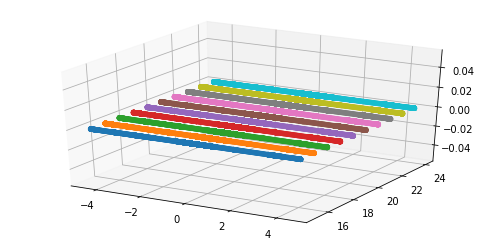

In [215]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range (15,25,1) :
  ax.scatter(X, alpha=1,ys=i)
plt.show()

## RNN implementation and Training

In [216]:
import tensorflow as tf 
print ('tensorflow version is ',tf.__version__)

tensorflow version is  2.8.2


#### RNN initialization

In [217]:
RNN=tf.keras.models.Sequential()

#### Architecture : 4 LSTMs layers 

**LSTM 1**

In [218]:
RNN.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], 1)))

20% of neurons of the LSTM will be dropped in training process :**it's a regularization used to prevent the RNN from the overftting** 

In [219]:
RNN.add(tf.keras.layers.Dropout(0.2))

**LSTM 2**

In [220]:
RNN.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
RNN.add(tf.keras.layers.Dropout(0.2))

**LSTM 3**

In [221]:
RNN.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
RNN.add(tf.keras.layers.Dropout(0.2))

**LSTM 4**

In [222]:
RNN.add(tf.keras.layers.LSTM(units = 50))
RNN.add(tf.keras.layers.Dropout(0.2))

In [223]:
RNN.add(tf.keras.layers.Dense(units=1))

In [224]:
RNN.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [225]:
RNN.fit(X,y_train_frame,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 106ms/step - loss: 0.0613
Epoch 2/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0077
Epoch 3/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0057
Epoch 11/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0044
Epoch 13/100

## Making predictions

In [226]:
XX_frame=pd.DataFrame(data=XX)

In [227]:
XX_test=XX_frame.iloc[1168:1208,:]
XX_test=XX_test.to_numpy()

In [228]:
XX_test = np.reshape(XX_test, (XX_test.shape[0], XX_test.shape[1], 1))

In [229]:
XX_test.shape

(40, 50, 1)

In [230]:
predicted_stock_price = RNN.predict(XX_test)


In [231]:
predicted_stock_price

array([[0.89867145],
       [0.89796585],
       [0.8963796 ],
       [0.89652634],
       [0.8985895 ],
       [0.89928913],
       [0.9007306 ],
       [0.9014337 ],
       [0.901692  ],
       [0.90058166],
       [0.9005704 ],
       [0.90048695],
       [0.9000199 ],
       [0.8982227 ],
       [0.8976541 ],
       [0.8965801 ],
       [0.89512813],
       [0.8937107 ],
       [0.89282   ],
       [0.89275295],
       [0.89167666],
       [0.8890823 ],
       [0.88933134],
       [0.8889193 ],
       [0.88738084],
       [0.887484  ],
       [0.8876564 ],
       [0.8883138 ],
       [0.8905878 ],
       [0.89153594],
       [0.8917552 ],
       [0.89171034],
       [0.8905945 ],
       [0.8890869 ],
       [0.88722867],
       [0.8850599 ],
       [0.88362116],
       [0.88280493],
       [0.8830024 ],
       [0.8838304 ]], dtype=float32)

In [232]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [233]:
predicted_stock_price

array([[831.8316 ],
       [831.79   ],
       [831.6964 ],
       [831.7051 ],
       [831.8268 ],
       [831.86804],
       [831.95306],
       [831.9946 ],
       [832.0098 ],
       [831.9443 ],
       [831.9436 ],
       [831.9387 ],
       [831.91113],
       [831.8052 ],
       [831.77155],
       [831.7082 ],
       [831.62256],
       [831.5389 ],
       [831.4864 ],
       [831.4824 ],
       [831.41895],
       [831.26587],
       [831.2805 ],
       [831.2562 ],
       [831.16547],
       [831.1715 ],
       [831.1817 ],
       [831.22046],
       [831.3547 ],
       [831.41064],
       [831.4236 ],
       [831.4209 ],
       [831.3551 ],
       [831.2661 ],
       [831.1565 ],
       [831.0285 ],
       [830.94366],
       [830.8955 ],
       [830.90717],
       [830.956  ]], dtype=float32)

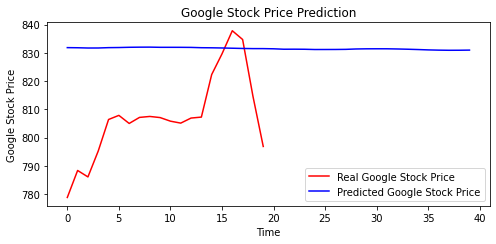

In [234]:
test_real=test.iloc[:,1:2].values
plt.plot(test_real, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

**as we see the model captures all the trends and it eliminates the spikes as we see there is a smooth trend in our model predictions and it starts to capture the godown trend at the end**